In [25]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import os
import joblib

Читаем csv с другой папки

In [26]:
tr = pd.read_csv('../csv_file/train.csv', low_memory=False) 

In [27]:
vd = pd.read_csv('../csv_file/valid.csv', low_memory=False) 

Сразу убираем дубликаты

In [28]:
tr = tr.drop_duplicates(subset=["client_id"]) 


In [29]:
vd = vd.drop_duplicates(subset=["client_id"]) 


Пора проверить пропуски

In [30]:
tr_missing_fraction = tr.isnull().mean()
vd_missing_fraction = vd.isnull().mean()

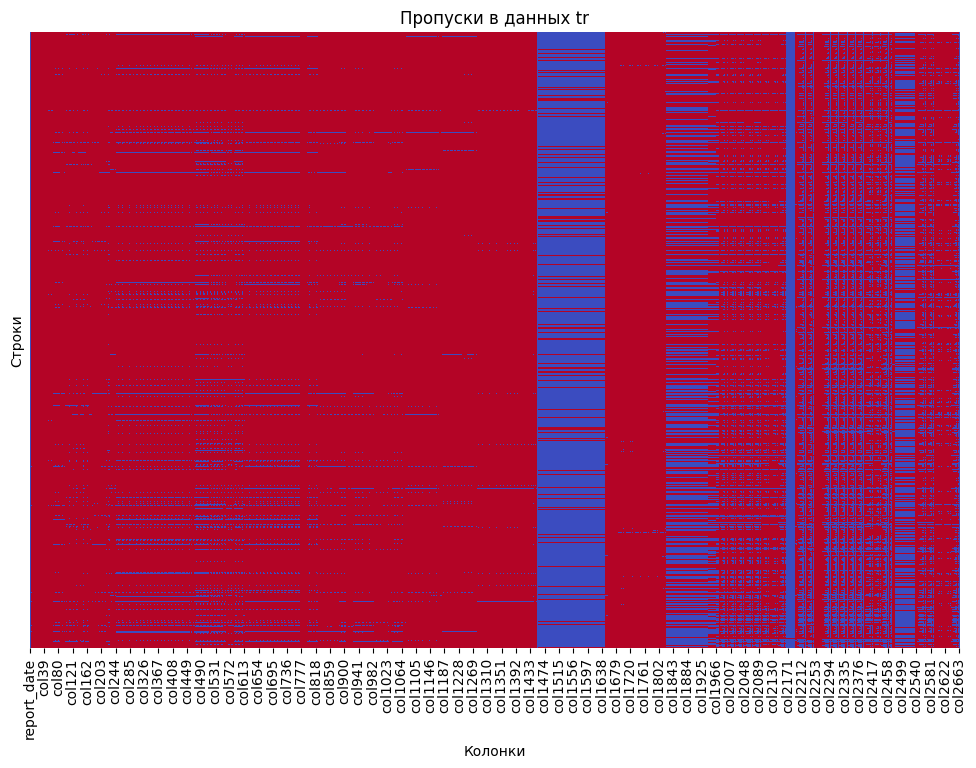

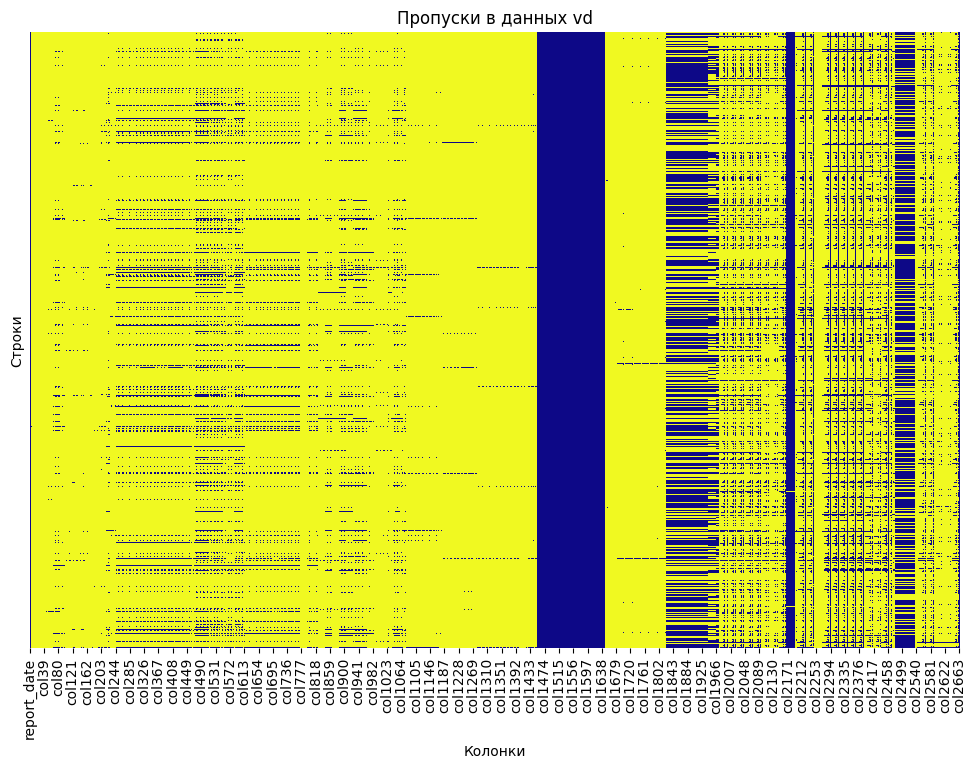

In [31]:
combined_missing_fraction = pd.concat([tr_missing_fraction, vd_missing_fraction], axis=1).max(axis=1)

# Визуализация пропусков в tr
plt.figure(figsize=(12, 8))
sns.heatmap(tr.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Пропуски в данных tr", fontsize=12)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

# Визуализация пропусков в vd
plt.figure(figsize=(12, 8))
sns.heatmap(vd.isnull(), cbar=False, cmap="plasma", yticklabels=False)
plt.title("Пропуски в данных vd", fontsize=12)
plt.xlabel("Колонки")
plt.ylabel("Строки")
plt.show()

In [32]:
threshold = 0.75

tr_missing_fraction = tr.isnull().mean()
vd_missing_fraction = vd.isnull().mean()

# Рассчитаем максимальную долю пропусков для каждой колонки между tr и vd
combined_missing_fraction = pd.concat([tr_missing_fraction, vd_missing_fraction], axis=1).max(axis=1)

# Определяем колонки для удаления, где доля пропусков больше threshold в обоих наборах данных
columns_to_drop = combined_missing_fraction[combined_missing_fraction > threshold].index

# Удаляем колонки с большим количеством пропусков
tr_cleaned = tr.drop(columns=columns_to_drop)
vd_cleaned = vd.drop(columns=columns_to_drop)

# Проверяем, совпадают ли структуры после удаления колонок с пропусками
if sorted(tr_cleaned.columns) != sorted(vd_cleaned.columns):
    raise ValueError("Структуры tr и vd не совпадают после удаления колонок с пропусками!")
else:
    print("Структуры tr и vd совпадают после удаления колонок с пропусками.")

# --- Дополнительная чистка: удаление колонок с данными разных типов ---
# Функция для проверки наличия одновременно float и object
def has_mixed_types(column):
    types = set(column.dropna().map(type))  # Собираем все типы в колонке, игнорируя NaN
    return float in types and str in types

# Определяем колонки с разными типами данных
mixed_type_columns_tr = [col for col in tr_cleaned.columns if has_mixed_types(tr_cleaned[col])]
mixed_type_columns_vd = [col for col in vd_cleaned.columns if has_mixed_types(vd_cleaned[col])]

# Удаляем эти колонки из обоих наборов данных
columns_to_drop_mixed = set(mixed_type_columns_tr).union(mixed_type_columns_vd)
tr_cleaned = tr_cleaned.drop(columns=columns_to_drop_mixed)
vd_cleaned = vd_cleaned.drop(columns=columns_to_drop_mixed)

# Проверяем, совпадают ли структуры после дополнительной чистки
if sorted(tr_cleaned.columns) != sorted(vd_cleaned.columns):
    raise ValueError("Структуры tr и vd не совпадают после удаления колонок с разными типами данных!")
else:
    print("Структуры tr и vd теперь совпадают после удаления колонок с разными типами данных.")

# Сохраняем обработанные данные в новые файлы
tr_cleaned.to_csv('tr_cleaned.csv', index=False)
vd_cleaned.to_csv('vd_cleaned.csv', index=False)

print("Обработанные файлы сохранены как 'tr_cleaned.csv' и 'vd_cleaned.csv'.")



Структуры tr и vd совпадают после удаления колонок с пропусками.
Структуры tr и vd теперь совпадают после удаления колонок с разными типами данных.
Обработанные файлы сохранены как 'tr_cleaned.csv' и 'vd_cleaned.csv'.
